In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import plotly.express as px
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split

# Zadanie 1 (4 pkt.)

Przeprowadź test T studenta na danych w pliku wyniki.csv

Hipoteza zerowa brzmi: nie ma istotnej różnicy w Ocenie końcowej pomiędzy uczniami i uczennicami.

Hipoteza alternatywna brzmi: istnieje istotna różnica (bez wskazania kierunku) w Ocenie końcowej pomiędzy uczniami i uczennicami.

Przyjmij significance level (alpha) na poziomie 0.05. Czy uda się odrzucić hipotezę zerową?


In [2]:
df = pd.read_csv("wyniki.csv")

In [3]:
kobiety = df.query("plec == 'F'")
mezczyzni = df.query("plec == 'M'")

In [4]:
# Sprawdzenie czy wariancja w grupach jest podobona
print(np.var(mezczyzni.ocena_koncowa), np.var(kobiety.ocena_koncowa))

10.557700108166575 10.022673484295106


In [5]:
sc.stats.ttest_ind(kobiety.ocena_koncowa, mezczyzni.ocena_koncowa,equal_var=True)

Ttest_indResult(statistic=-1.9404771273257526, pvalue=0.0531131748457915)

In [6]:
# Jest minimalna róznica, nie odrzucamy H0 - przyjmujemy ją jako prawdziwą jako pval > 0.05.

# Zadanie 2 (2 pkt)

Korzystając z danych w pliku ZyskiFirmyX.csv stwórz model regresji liniowej i biblioteki statmodels:

•	Wyświetl wykres pokazujący zyski w czasie. 

•	Czy da się zaobserwować trend? Jaki?

•	Wyświetl podsumowanie modelu.


In [7]:
df2 = pd.read_csv("ZyskiFirmyX.csv")
df2.columns

Index(['Rok', 'Zysk'], dtype='object')

In [8]:
px.scatter(df2, y="Zysk", x="Rok",trendline="ols")

#Nie wygląda na to, zeby był jakiś trend

In [9]:
reg_lin = sm.OLS(endog=df2.Zysk, exog=df2.Rok)
res = reg_lin.fit()

In [10]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Zysk   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              870.1
Date:                Wed, 18 Jan 2023   Prob (F-statistic):                    1.39e-74
Time:                        20:25:18   Log-Likelihood:                         -1522.0
No. Observations:                 200   AIC:                                      3046.
Df Residuals:                     199   BIC:                                      3049.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rok            0.5315      0.018     29.498      0.000       0.496       0.567
==============================================================================
Omnibus:                        0.622   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.542
Skew:                          -0.127   Prob(JB):                        0.762
Kurtosis:                       2.991   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Zadanie 3 (6 pkt.)
Korzystając z danych w pliku spendingscores.csv i biblioteki statmodels:
1.	stwórz model regresji liniowej, gdzie zmienną zależną jest Spending score, a zmiennymi niezależnymi pozostałe zmienne.
2.	Z modelu wyświetl:
a.	p values
b.	standard dev
c.	coefficients
3.	Sprawdź czy istnieje korelacja pomiędzy zmiennymi. Pokaż to na wykresie, np. z biblioteki plotly express.
4.	Korzystając z eliminacji wstecznej usuń najmniej istotną zmienną i jeszcze raz wyświetl model.

UWAGA: zwróć uwagę na zmienne będące kategoriami!


In [42]:
df3 = pd.read_csv("spendingscores.csv")
df3[['Female', 'Male']] = pd.get_dummies(df3.Gender)
df3 = df3.drop(['Gender', 'Male'], axis=1)
df3 = df3.rename(columns={"Female":"Sex"})

In [43]:
train, test = train_test_split(df3, test_size=0.2)

In [44]:
reg_lin = sm.OLS(endog=train.SpendingScore, exog=train[["Age", "AnnualIncome", "Sex"]])
res = reg_lin.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          SpendingScore   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.715
Method:                 Least Squares   F-statistic:                              134.5
Date:                Wed, 18 Jan 2023   Prob (F-statistic):                    3.51e-43
Time:                        20:30:11   Log-Likelihood:                         -769.40
No. Observations:                 160   AIC:                                      1545.
Df Residuals:                     157   BIC:                                      1554.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Age              0.2899      0.118      2.451      0.015       0.056       0.524
AnnualIncome     0.4209      0.071      5.904      0.000       0.280       0.562
Sex             16.0902      4.441      3.623      0.000       7.318      24.862
==============================================================================
Omnibus:                        1.469   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.397
Skew:                           0.119   Prob(JB):                        0.497
Kurtosis:                       2.609   Cond. No.                         141.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
res.pvalues

Age             1.535095e-02
AnnualIncome    2.116872e-08
Sex             3.927010e-04
dtype: float64

In [46]:
res.bse

Age             0.118285
AnnualIncome    0.071283
Sex             4.441093
dtype: float64

In [47]:
res.params

Age              0.289895
AnnualIncome     0.420882
Sex             16.090225
dtype: float64

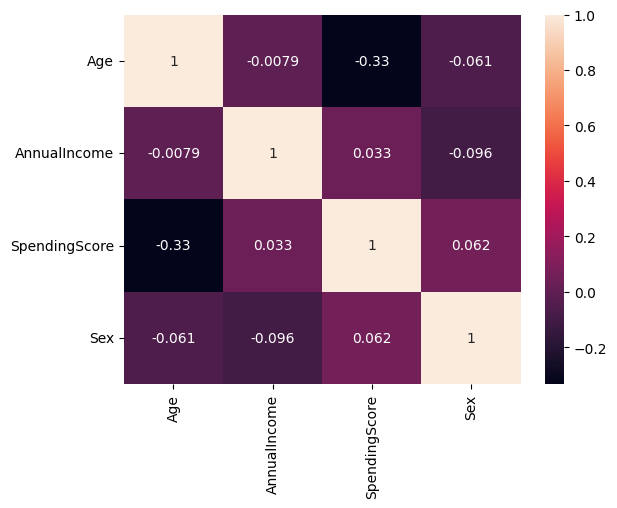

In [48]:
corel =   train.corr()
fig = sns.heatmap(corel,annot=True)

In [57]:
reg_lin2 = sm.OLS(endog=train.SpendingScore, exog=train[["AnnualIncome", "Sex"]])
res2 = reg_lin2.fit()

In [58]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          SpendingScore   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.706
Method:                 Least Squares   F-statistic:                              192.7
Date:                Wed, 18 Jan 2023   Prob (F-statistic):                    4.22e-43
Time:                        20:32:18   Log-Likelihood:                         -772.40
No. Observations:                 160   AIC:                                      1549.
Df Residuals:                     158   BIC:                                      1555.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
AnnualIncome     0.5489      0.049     11.138      0.000       0.452       0.646
Sex             19.7435      4.249      4.646      0.000      11.351      28.136
==============================================================================
Omnibus:                        0.009   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.080
Skew:                           0.017   Prob(JB):                        0.961
Kurtosis:                       2.896   Cond. No.                         116.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Oszacowanie Adjusted R squared zmalało, kryteria informacyjne zmalały - drugi model bez zmiennej Age jest gorszy